# Upper Confidence Bound (UCB)

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
N = 1000 # Total Number of Rounds
d = 10 # Total Number of Ads
ads_selected = [] 
numbers_of_selections = [0]*d # Number of selections for each ads
sums_of_rewards = [0]*d # Sum of rewards for each of the ads up to round n
total_reward = 0 # Total rewards accumulated over the rounds


for n in range(0, N):
    max_upper_bound = 0
    ad = 0  
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            avg_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(1.5 * (math.log(n+1)/numbers_of_selections[i]))
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
            
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualizing the results

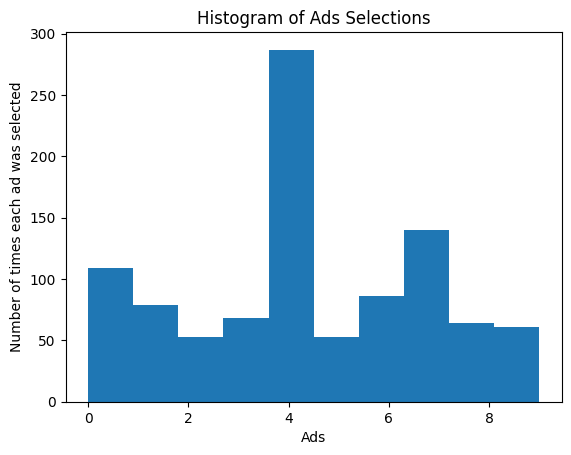

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()